In [1]:
from numba import njit,prange
import numpy as np
import matplotlib.pyplot as plt

### Mandelbrot Set
$f_c(z) = z^2 + c$

In [2]:
# numba go brrr
@njit(parallel=True)
def find_m(x,y,div,it):
    d = 2
    c = x+y*1j
    m = np.zeros_like(x+y)
    for i in prange(div):
        for j in prange(div):
            z = 0
            r = 0
            for r in range(it):
                z = z**d + c[i,j]
                if np.abs(z)>4:
                    m[i,j] = r
                    break
            else: m[i,j] = it
    return m

In [3]:
div = 1000
it = 100
x,y = np.meshgrid(np.linspace(-1.5,0.5,div),np.linspace(-1,1,div))
m = find_m(x,y,div,it)

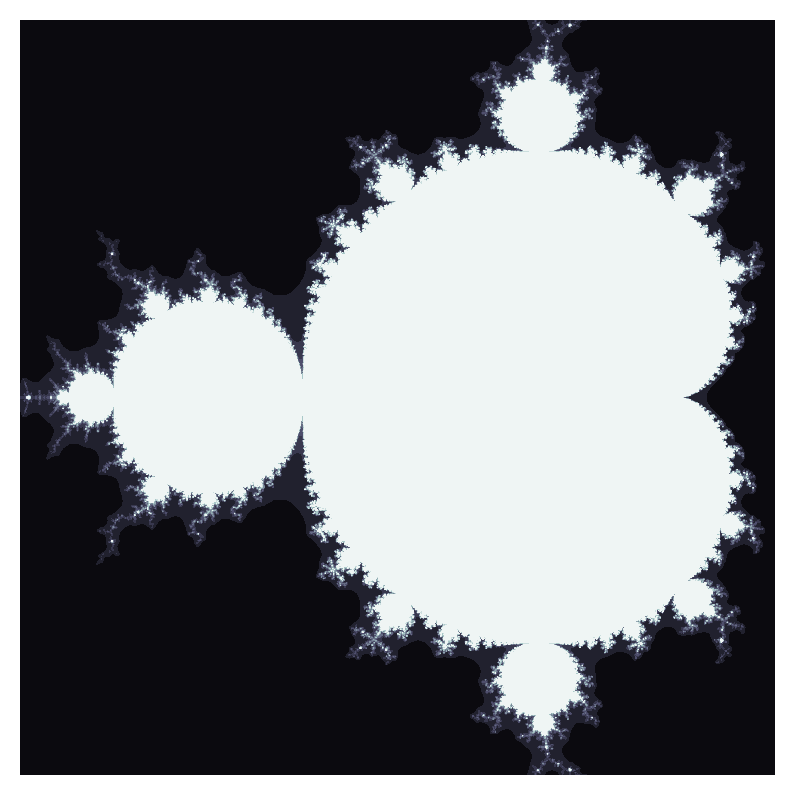

In [4]:
plt.figure(figsize=(5,5),dpi=200)
plt.contourf(x,y,m,levels=10,cmap='bone')
plt.axis('scaled')
plt.axis('off')
plt.show()

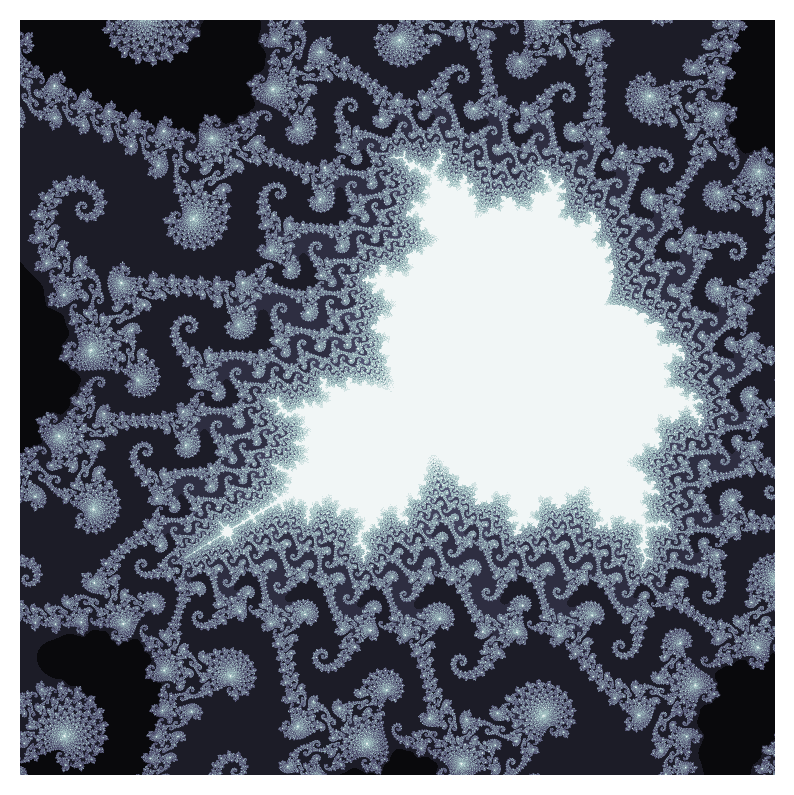

In [5]:
# 2^18 magnification of a boundary section
X,Y = -0.743643887037158704752191506114774,0.131825904205311970493132056385139
div = 10000
it = 1000
r = 1/(2**18)
x,y = np.meshgrid(np.linspace(X-r,X+r,div),np.linspace(Y-r,Y+r,div))
m = find_m(x,y,div,it)
plt.figure(figsize=(5,5),dpi=200)
plt.contourf(x,y,m,levels=10,cmap='bone')
plt.axis('scaled')
plt.axis('off')
plt.show()